# Python Tutorial Session 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Complex numbers

In [2]:
a = 1 + 2j

In [3]:
b = 10 + 20.0j

In [4]:
a+b

(11+22j)

In [5]:
a*b

(-30+40j)

## Functions

In [6]:
def add(x, y):
    z = x + y
    return z

In [7]:
add2 = add

In [8]:
add(1.0, 2.0)

3.0

In [9]:
add2(1.0, 2) + 5

8.0

In [10]:
## Higher Order Functions

In [11]:
def make_adder(constant):
    def myadder(x):
        return x + constant
    return myadder

In [12]:
add_two = make_adder(2)

In [13]:
add_two(3)

5

In [14]:
add_five = make_adder(5)

In [15]:
# Want a function
# hamiltonian: kx |-> -t0 - 2 t1 cos (kx) - 2 t2 cos(2 kx)

In [16]:
def make_hamiltonian(t0, t1, t2):
    def hamiltonian(kx):
        return -t0 - 2 * t1 * np.cos(kx) - 2 * t2 * np.cos(2*kx)
    return hamiltonian

In [17]:
h1 = make_hamiltonian(0.0, 1.0, 0.0)

In [18]:
kxs = np.linspace(0, 2*np.pi, 16, endpoint=False)

In [19]:
e1s = []
for kx in kxs:
    e1s.append( h1(kx) )

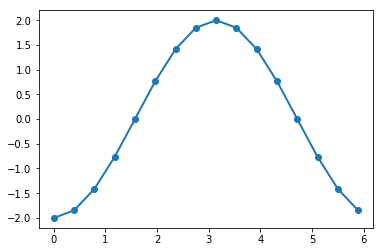

In [20]:
plt.plot(kxs, e1s, 'o-', linewidth=2)

In [21]:
h2 = make_hamiltonian(0.5, 1.0, 0.2)

In [22]:
e2s = []
for kx in kxs:
    e2s.append( h2(kx) )

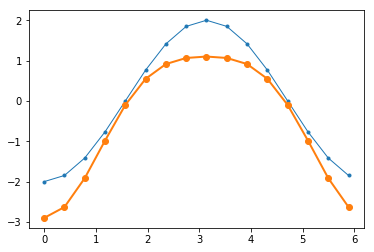

In [23]:
plt.plot(kxs, e1s, '.-', linewidth=1)
plt.plot(kxs, e2s, 'o-', linewidth=2)

## Example: Graphene Band Structure

$$
H(\mathbf{k}) = \begin{pmatrix} -\mu & -t \sum_{i} e^{-i \mathbf{k} \cdot \delta_{i}} \\ c.c. & -\mu \end{pmatrix}
$$

In [24]:
delta_1 = np.array([0, 1])
delta_2 = np.array([-np.sqrt(3)*0.5, -0.5])
delta_3 = np.array([+np.sqrt(3)*0.5, -0.5])

In [25]:
# Creating a multidimensional array from other arrays

deltas = np.array([delta_1,
                   delta_2,
                   delta_3])

In [26]:
deltas

array([[ 0.       ,  1.       ],
       [-0.8660254, -0.5      ],
       [ 0.8660254, -0.5      ]])

In [27]:
# Array slicing
deltas[0, :]

array([0., 1.])

In [28]:
# Indexing from the end
deltas[-2, :]

array([-0.8660254, -0.5      ])

In [29]:
# range(6) similar to [0,1,2,3,4,5]

In [30]:
def make_graphene_hamiltonian(mu, t):
    def h(k):  # k: numpy array of size 2
        retval = np.zeros((2,2), dtype=np.complex128)
        sum_of_exps = 0
        for i in range(3):
            sum_of_exps = sum_of_exps + np.exp(-1j * np.dot(k, deltas[i, :]))
        retval[0,0] = -mu
        retval[0,1] = -t * sum_of_exps
        retval[1,0] = -t * sum_of_exps.conj()
        retval[1,1] = -mu
        return retval
    
    return h

In [31]:
def make_graphene_hamiltonian(mu, t):
    def h(k):  # k: numpy array of size 2
        sum_of_exps = 0
        for i in range(3):
            sum_of_exps += np.exp(-1j * np.dot(k, deltas[i, :]))
        return np.array([[ -mu                    , -t * sum_of_exps],
                         [ -t * sum_of_exps.conj(), -mu             ]])
    return h

In [32]:
h_graphene = make_graphene_hamiltonian(0.0, 1.0)

In [33]:
kxs = np.linspace(-np.pi, np.pi, 16+1)

In [34]:
h_graphene(np.array([0.0, 0.0]))

array([[-0.+0.j, -3.+0.j],
       [-3.+0.j, -0.+0.j]])

In [35]:
## eigh    -> both eigenvalues and eigenvectors (of a Hermitian matrix)
## eigvalsh -> just eigenvalues

In [36]:
all_eigenvalues = []
for kx in kxs:
    k = np.array([kx, 0.0])
    h_mat = h_graphene(k)
    eigenvalues = np.linalg.eigvalsh(h_mat)   # 1D numpy array of size 2
    all_eigenvalues.append( eigenvalues )

In [37]:
# <-- Here, all_eigenvalues is a list of numpy arrays.
all_eigenvalues

[array([-0.8254484,  0.8254484]),
 array([-0.44831968,  0.44831968]),
 array([-0.09471255,  0.09471255]),
 array([-0.74144451,  0.74144451]),
 array([-1.41779373,  1.41779373]),
 array([-2.04628512,  2.04628512]),
 array([-2.55492564,  2.55492564]),
 array([-2.88545104,  2.88545104]),
 array([-3.,  3.]),
 array([-2.88545104,  2.88545104]),
 array([-2.55492564,  2.55492564]),
 array([-2.04628512,  2.04628512]),
 array([-1.41779373,  1.41779373]),
 array([-0.74144451,  0.74144451]),
 array([-0.09471255,  0.09471255]),
 array([-0.44831968,  0.44831968]),
 array([-0.8254484,  0.8254484])]

In [38]:
# After the following line, all_eigenvalues is a two-dimensional numpy array
all_eigenvalues = np.array(all_eigenvalues)

In [39]:
all_eigenvalues

array([[-0.8254484 ,  0.8254484 ],
       [-0.44831968,  0.44831968],
       [-0.09471255,  0.09471255],
       [-0.74144451,  0.74144451],
       [-1.41779373,  1.41779373],
       [-2.04628512,  2.04628512],
       [-2.55492564,  2.55492564],
       [-2.88545104,  2.88545104],
       [-3.        ,  3.        ],
       [-2.88545104,  2.88545104],
       [-2.55492564,  2.55492564],
       [-2.04628512,  2.04628512],
       [-1.41779373,  1.41779373],
       [-0.74144451,  0.74144451],
       [-0.09471255,  0.09471255],
       [-0.44831968,  0.44831968],
       [-0.8254484 ,  0.8254484 ]])

In [40]:
all_eigenvalues.shape

(17, 2)

In [41]:
# all_eigenvalues[:, 0]  # eigenvalues of the lower band
# all_eigenvalues[:, 1]  # eigenvalues of the upper band

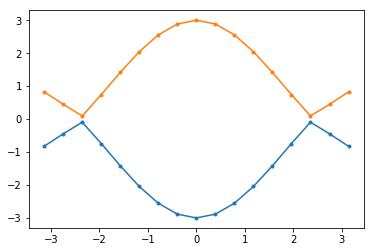

In [42]:
plt.plot(kxs, all_eigenvalues[:,0], '.-')
plt.plot(kxs, all_eigenvalues[:,1], '.-')

In [43]:
kxs = np.linspace(-2*np.pi, 2*np.pi, 100+1)
kys = np.linspace(-2*np.pi, 2*np.pi, 100+1)

In [44]:
all_eigenvalues = []
for kx in kxs:
    for ky in kys:
        k = np.array([kx, ky])
        h_mat = h_graphene(k)
        eigenvalues = np.linalg.eigvalsh(h_mat)
        all_eigenvalues.append(eigenvalues)

In [45]:
all_eigenvalues = np.array(all_eigenvalues)

In [46]:
all_eigenvalues.shape

(10201, 2)

In [47]:
# array reshaping
all_eigenvalues.shape = (101, 101, 2)

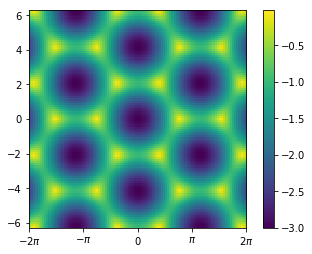

In [48]:
plt.imshow(all_eigenvalues[:, :, 0].transpose(),
           origin='lower',
           extent=[np.min(kxs), np.max(kxs), np.min(kys), np.max(kys)]
          )
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi],
           [r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
plt.colorbar()

In [49]:
## r'...' : raw string
print(r'\alpha + \beta')
print('\alpha + \beta')

\alpha + \beta
lpha +eta
